In [10]:
import numpy as np
import matplotlib as plt
import scipy as sp

# matrix A
A = np.fromfunction(lambda i, j: (1 / (70 - 3*i - j)), (5,5))
print('A:')
print(A)
print()

# matrix A error
A_err = np.copy(A)
A_err[0][0] += 10**(-3)
print('A error:')
print(A_err)
print()

# vector x
x = np.array([12] * 5)
print('x:')
print(x)
print()

# vector b
b = A @ x
print('b:')
print(b)
print()

# vector b error
b_err = b
b[0] += 10**(-3)
#print('b error:')
#print(b_err)
#print()

A:
[[0.01428571 0.01449275 0.01470588 0.01492537 0.01515152]
 [0.01492537 0.01515152 0.01538462 0.015625   0.01587302]
 [0.015625   0.01587302 0.01612903 0.01639344 0.01666667]
 [0.01639344 0.01666667 0.01694915 0.01724138 0.01754386]
 [0.01724138 0.01754386 0.01785714 0.01818182 0.01851852]]

A error:
[[0.01528571 0.01449275 0.01470588 0.01492537 0.01515152]
 [0.01492537 0.01515152 0.01538462 0.015625   0.01587302]
 [0.015625   0.01587302 0.01612903 0.01639344 0.01666667]
 [0.01639344 0.01666667 0.01694915 0.01724138 0.01754386]
 [0.01724138 0.01754386 0.01785714 0.01818182 0.01851852]]

x:
[12 12 12 12 12]

b:
[0.88273486 0.92351423 0.96824589 1.01753401 1.07211262]



In [11]:
# LU mods A
def Solve_LU(A, b):
    n = A.shape[0]
    L = np.eye(n)
    for j in range(n):
        for i in range(j + 1, n):
            L[i][j] = A[i][j] / A[j][j]
            for k in range(j, n):
                A[i][k] -= L[i][j] * A[j][k]
    x = np.zeros(n)
    y = np.zeros(n)
    
    for i in range(n):
        summ = 0
        for j in range(i):
            summ += L[i][j] * y[j]
        y[i] = b[i] - summ
    for i in reversed(range(n)):
        summ = 0
        for j in reversed(range(i + 1, n)):
            summ += A[i][j] * x[j]
        x[i] = (y[i] - summ) / A[i][i]
    return x

#LU patrial choice creates LU without mod A
def Get_LUP(A):
    n = A.shape[0]
    L = np.eye(n)
    P = np.eye(n)
    U = np.copy(A)
    for j in range(n - 1):
        max_abs = abs(U[j][j])
        max_i = j
        for i in range(j + 1, n):
            if (abs(U[i][j]) > max_abs):
                max_abs = abs(U[i][j])
                max_i = i
        P_j = np.eye(n)
        if (max_i != j):
            P_j[j][j] = 0
            P_j[max_i][max_i] = 0
            P_j[max_i][j] = 1
            P_j[j][max_i] = 1
        L_j = np.eye(n)
        U = P_j @ U
        for i in range(j + 1, n):
            L_j[i][j] = -1 * U[i][j] / U[j][j]
        U = L_j @ U
        for i in range(j + 1, n):
            L_j[i][j] *= -1
        L = L @ P_j @ L_j
        P = P_j @ P
    L = P @ L    
    return L, U, P

# Solves by LU
def Solve_LUP(L, U, P, b):
    b = P @ b
    n = L.shape[0]
    x = np.zeros(n)
    y = np.zeros(n)
    
    for i in range(n):
        summ = 0
        for j in range(i):
            summ += L[i][j] * y[j]
        y[i] = b[i] - summ
    for i in reversed(range(n)):
        summ = 0
        for j in reversed(range(i + 1, n)):
            summ += U[i][j] * x[j]
        x[i] = (y[i] - summ) / U[i][i]
    return x

In [13]:
L1, U1, P1 = Get_LUP(A_err)
x1 = Solve_LUP(L1, U1, P1, b)
x2 = Solve_LU(A_err, b)
# Т.к. функция меняет A_err, то мы её восстановим
A_err = np.copy(A)
A_err[0][0] += 10**(-3)
print(x1)
print(x2)

[  1.00000002  53.24303966 -45.92638457  48.11940406   3.56392343]
[  1.00000002  53.24304047 -45.92638689  48.11940626   3.56392273]


In [14]:
def delta_x(x, x_err):
    return np.linalg.norm(x - x_err, ord = 2) / np.linalg.norm(x_err, ord = 2)

def delta_x_th(A_err):
    return np.linalg.cond(A_err) * 10**(-3) / np.linalg.norm(A_err, ord = 2)

print('Cond A_err: ', np.linalg.cond(A_err))
print('Theoretic delta x: ', delta_x_th(A_err))
print('Current delta x for LU: ', delta_x(x, x2))
print('Current delta x for LUP: ', delta_x(x, x1))

Cond A_err:  53216503903.95434
Theoretic delta x:  1595646476.3732166
Current delta x for LU:  0.9492138555407815
Current delta x for LUP:  0.9492138519051789


In [15]:
delta_x1 = []
delta_x2 = []
for n in range(5, 16):
    # matrix A
    A = np.fromfunction(lambda i, j: (1 / (70 - 3*i - j)), (n, n))

    # matrix A error
    A_err = np.copy(A)
    A_err[0][0] += 10**(-3)

    # vector x
    x = np.array([12] * n)

    # vector b
    b = A @ x

    # vector b error
    b_err = b
    b[0] += 10**(-3)
    
    L1, U1, P1 = Get_LUP(A_err)
    x1 = Solve_LUP(L1, U1, P1, b)
    x2 = Solve_LU(A_err, b)
    delta_x1.append(delta_x(x, x1))
    delta_x2.append(delta_x(x, x2))
print(delta_x1)
print(delta_x2)

[0.9492138519051789, 0.9792839631133177, 0.9918460005417629, 0.9962665790138961, 0.9999991476860036, 0.9909944425517689, 0.9969765455084291, 0.9976440626768303, 0.9985879537811344, 0.9999952221724573, 0.9998418484434299]
[0.9492138555407815, 0.9792842976710908, 0.9917911344995493, 0.9967943540706182, 0.9950621696822688, 0.9974909029830452, 0.9997383719143493, 0.9984977238719348, 0.9998935342271366, 0.9987372571824021, 0.9992862591740301]


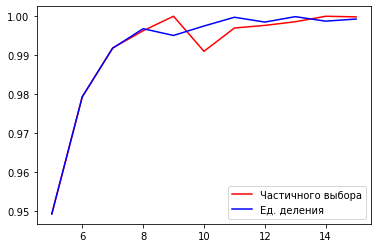

In [16]:
import matplotlib.pyplot as plty

plty.plot(range(5, 16), delta_x1, color = 'red', label = 'Частичного выбора')
plty.plot(range(5, 16), delta_x2, color = 'blue', label = 'Ед. деления')
plty.legend()

In [27]:
# главная диагональ = 150
# 8 поддиаг = 15
# 25 поддиаг = 40
# n = 30
# b_i = ni - i^2

def Solve_Bash(a, c, d, b):
    x = []
    for i in range(0, 8):
        x.append(b[i] / a)
    for i in range(8, 25):
        x.append((b[i] - c * x[i - 8]) / a)
    for i in range(25, 30):
        x.append((b[i] - c * x[i - 8] - d * x[i - 25]) / a)
    return x

b = []
for i in range(30):
    b.append(30*i - i*i)
print('b: ', b)
print()
#Тестовый пример, a = 1, c = -1, d = -1
b_test = np.array([5]*30)
print('Test: ', Solve_Bash(1.0, -1.0, -1.0, b_test))
print()
#Задача, a = 150, c = 15, d = 40
print('X: ', Solve_Bash(150.0, 15.0, 40.0, b))
print()

b:  [0, 29, 56, 81, 104, 125, 144, 161, 176, 189, 200, 209, 216, 221, 224, 225, 224, 221, 216, 209, 200, 189, 176, 161, 144, 125, 104, 81, 56, 29]

Test:  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 20.0, 25.0, 25.0, 25.0, 25.0, 25.0]

X:  [0.0, 0.19333333333333333, 0.37333333333333335, 0.54, 0.6933333333333334, 0.8333333333333334, 0.96, 1.0733333333333333, 1.1733333333333333, 1.2406666666666666, 1.296, 1.3393333333333333, 1.3706666666666667, 1.39, 1.3973333333333333, 1.3926666666666667, 1.3760000000000001, 1.3492666666666666, 1.3104, 1.2594, 1.1962666666666666, 1.121, 1.0335999999999999, 0.9340666666666667, 0.8224, 0.6984066666666666, 0.5107377777777777, 0.31450444444444436, 0.10970666666666663, -0.10365555555555557]



In [25]:
# m = 25, N = 12
import math
m = 25
N = 12
beta = (abs(66 - N) + 5) * m

A = np.array([[0.1 * beta * np.math.exp((-1) * (i - j)**2) + np.math.cos(i + j)/(0.1*beta) for j in range(m)] for i in range(m)])

# vector x
x = np.array([12] * m)
print('x:')
print(x)
print()

# vector b
b = A @ x
print('b:')
print(b)
print()

x:
[12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12]

b:
[2453.77442914 3104.92032431 3137.34767907 3137.57620322 3137.57863047
 3137.57094936 3137.56042103 3137.5567252  3137.5632598  3137.57401695
 3137.57910657 3137.5738493  3137.56307863 3137.55669708 3137.56057181
 3137.57114041 3137.57868616 3137.57627153 3137.56611653 3137.5575576
 3137.55846378 3137.56780275 3137.35876819 3104.94070772 2453.78536643]



In [24]:
def ConjGradMethod(A, b, m, eps) :
    x = np.zeros(m)
    r_prev = b - (A @ x)
    z = r_prev
    check = np.linalg.norm(r_prev, ord = 2)/np.linalg.norm(b, ord = 2)
    while check >= eps:
        a = np.dot(r_prev, r_prev)/np.dot(A @ z, z)
        x = x + a * z
        r_new = r_prev - a * (A @ z)
        bet = np.dot(r_new, r_new)/np.dot(r_prev, r_prev)
        z = r_new + bet * z
        r_prev = r_new
        check = np.linalg.norm(r_prev, ord = 2)/np.linalg.norm(b, ord = 2)
    return x

print(ConjGradMethod(A, b, m, 10**(-10)))

[12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 12. 12.]
